# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameters of a Neural Network

🌗 In this challenge, we will be working with the **moons dataset**. 
* Your goal is to build a Neural Network which separates two classes. 
* Each data point $X$ has two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or the class 1
* These bi-dimensional points can be represented on a 2D-scatterplot, using colors to represent to two available classes $\color{blue}{blue}$ and $\color{red}{red} $
* Here is an example of such a moon dataset:

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/moons_dataset.png" />

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [35]:
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import models
from tensorflow.keras import layers

### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

2023-05-14 11:40:29.436042: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-14 11:40:29.574504: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-14 11:40:29.578337: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-14 11:40:29.578349: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

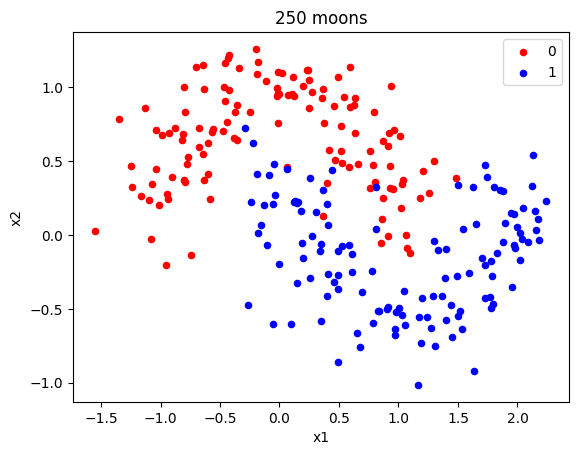

In [16]:
### This function allows to plot the two moons
def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

Noise: 0


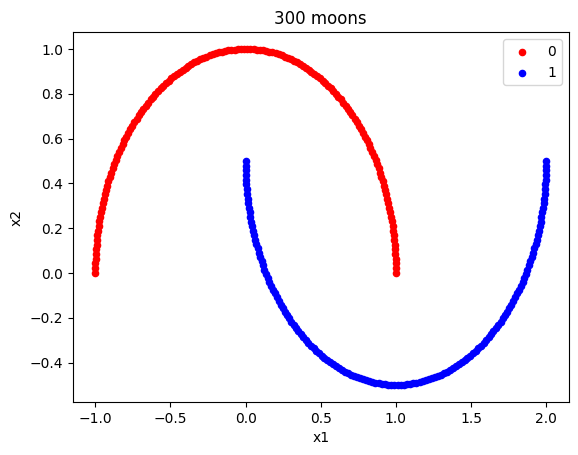

Noise: 0.2


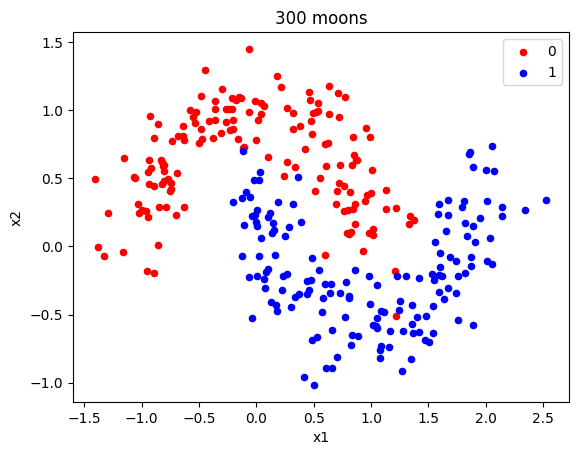

Noise: 0.3


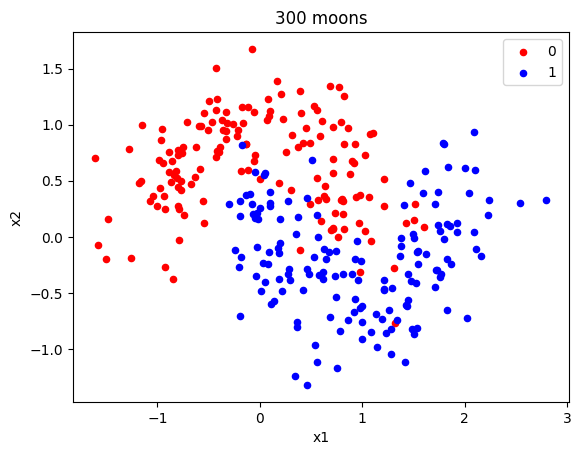

Noise: 0.4


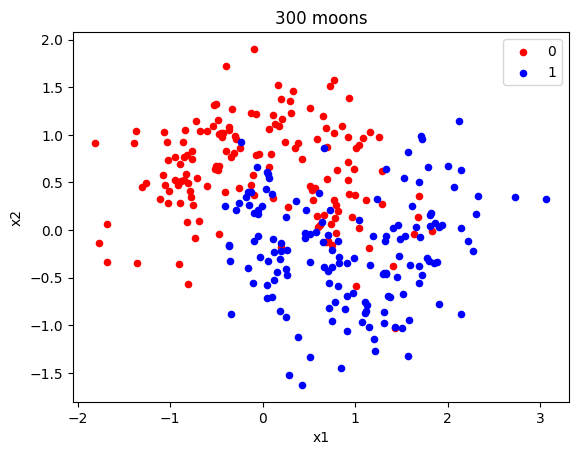

Noise: 0.6


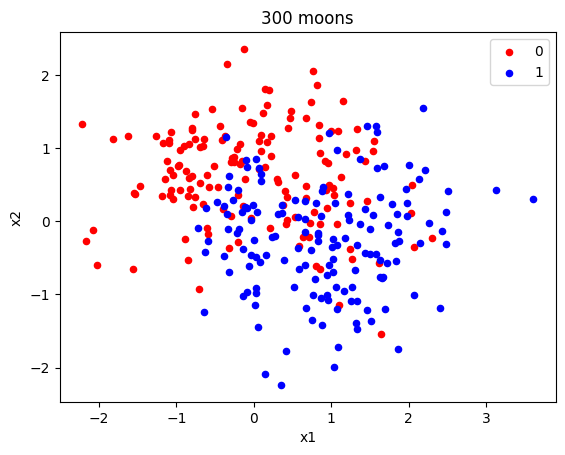

In [23]:
# YOUR CODE HERE
noise = [0, 0.20, 0.30, 0.40, 0.60]
for i in noise:
    X, y = make_moons(n_samples= 300, noise=i, random_state=0)
    print(f"Noise: {i}")
    plot_moons(X, y)

n_samples:1


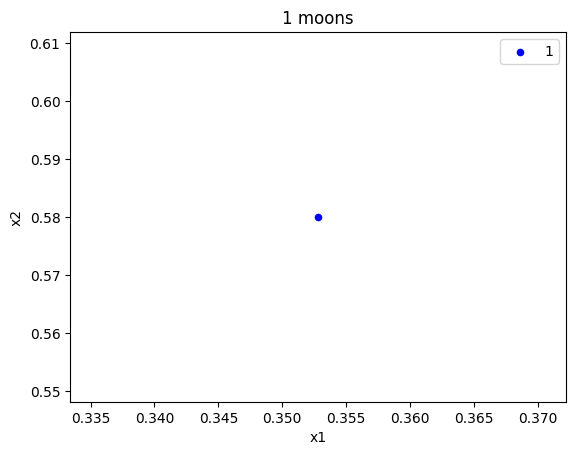

n_samples:100


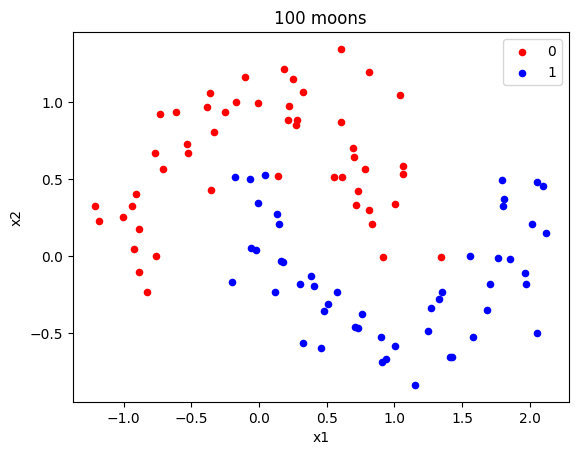

n_samples:200


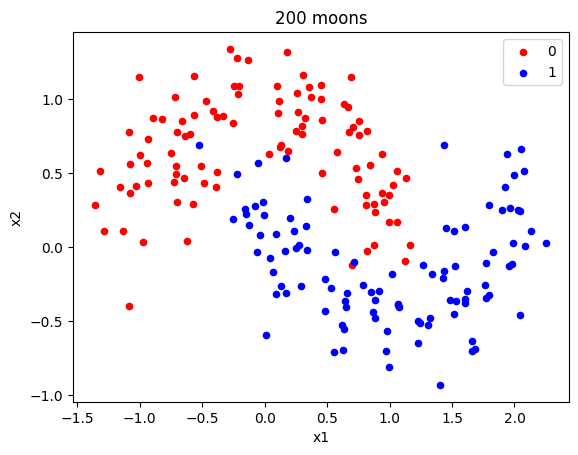

n_samples:300


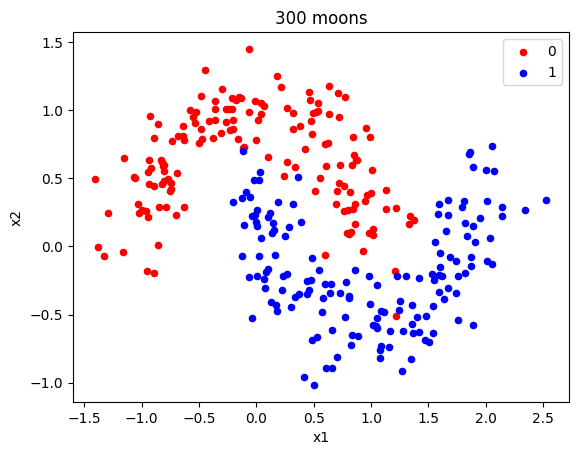

n_samples:400


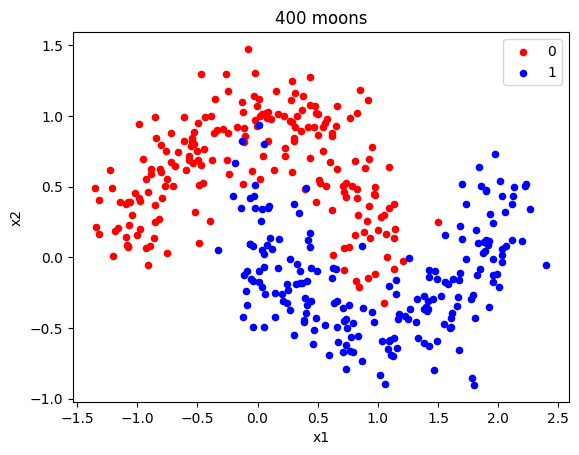

n_samples:500


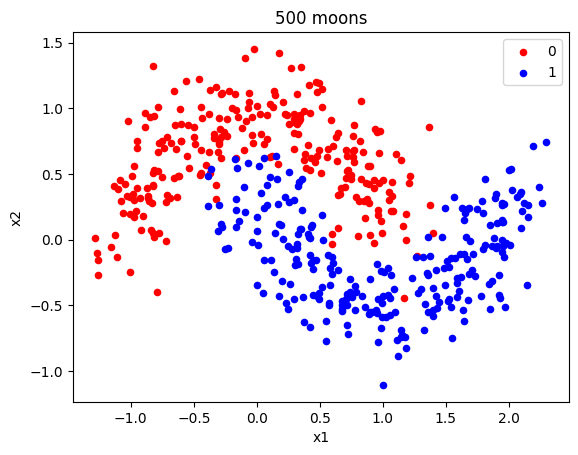

In [27]:
samples = [1, 100, 200, 300, 400, 500]

for i in samples:
    X, y = make_moons(n_samples=i, noise=0.20, random_state=0)
    print(f"n_samples:{i}")
    plot_moons(X,y)

❓ Create 250 samples of the data with ❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [29]:
# YOUR CODE HERE
X, y = make_moons(n_samples=250, noise=0.20, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((175, 2), (75, 2), (175,), (75,))

## (2) Designing a basic Neural Network  for a binary classification task

🧠 You will now define your first neural network.
The architecture of your model should have: 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [33]:
# YOUR CODE HERE
model = models.Sequential()

2023-05-14 12:08:18.135615: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-14 12:08:18.135785: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-14 12:08:18.135832: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-05-14 12:08:18.135868: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-05-14 12:08:18.135901: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [37]:
def initialize_model():
    model = models.Sequential()
    
    #############################
    #  1 - Model architecture   #
    #############################    
    
    model.add(layers.Dense(5, activation="relu", input_dim=2))
    model.add(layers.Dense(1, activation="sigmoid"))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model()

---

<details>
    <summary><i>Intuitions about the optimization method</i></summary>

We'll keep this message short as you have a full course 📆 **Deep Learning - Optimizers, Loss, Fitting** coming soon.
    
So, briefly speaking:
    
- the ***.compile()*** tells your algorithm how to optimize the weights of your network when fitting the network on real data
    - the ***binary_crossentropy*** is the "log-loss" that you have already seen in Machine Learning in the context of a Logistic Regression for classification
    - To date, the ***adam*** optimizer is the gold standard in Deep Learning - an optimizer in Deep Learning is like a solver in Machine Learning: it provides an iterative method to minimize the loss function of an algorithm with respect to its parameters
    
</details>

---



❓ How many parameters does the model have?  ❓

<details>
    <summary><i>Hint</i></summary>

The `.summary()`method displays:
   - the stack of layers of your Neural Network
   - the output shape after each layer
   - the number of parameters for each layer (and consequently the total number of parameters)
    
</details>


In [38]:
# YOUR CODE HERE
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 5)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set using `100 epochs`! 

Store the results of the training into a `history` variable. ❓

In [41]:
# YOUR CODE HERE
model = initialize_model()

history = model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=2)

Epoch 1/100
35/35 - 1s - loss: 0.6761 - accuracy: 0.5829 - 579ms/epoch - 17ms/step
Epoch 2/100
35/35 - 0s - loss: 0.6451 - accuracy: 0.5829 - 80ms/epoch - 2ms/step
Epoch 3/100
35/35 - 0s - loss: 0.6161 - accuracy: 0.6857 - 62ms/epoch - 2ms/step
Epoch 4/100
35/35 - 0s - loss: 0.5898 - accuracy: 0.8229 - 63ms/epoch - 2ms/step
Epoch 5/100
35/35 - 0s - loss: 0.5641 - accuracy: 0.8171 - 64ms/epoch - 2ms/step
Epoch 6/100
35/35 - 0s - loss: 0.5413 - accuracy: 0.8171 - 58ms/epoch - 2ms/step
Epoch 7/100
35/35 - 0s - loss: 0.5186 - accuracy: 0.8286 - 56ms/epoch - 2ms/step
Epoch 8/100
35/35 - 0s - loss: 0.4984 - accuracy: 0.8286 - 63ms/epoch - 2ms/step
Epoch 9/100
35/35 - 0s - loss: 0.4812 - accuracy: 0.8229 - 65ms/epoch - 2ms/step
Epoch 10/100
35/35 - 0s - loss: 0.4641 - accuracy: 0.8171 - 62ms/epoch - 2ms/step
Epoch 11/100
35/35 - 0s - loss: 0.4496 - accuracy: 0.8171 - 65ms/epoch - 2ms/step
Epoch 12/100
35/35 - 0s - loss: 0.4369 - accuracy: 0.8229 - 69ms/epoch - 2ms/step
Epoch 13/100
35/35 - 0s

👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [42]:
# YOUR CODE HERE
history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x7f07b96487f0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.676052451133728,
   0.645080029964447,
   0.6160863041877747,
   0.5898131728172302,
   0.5640835762023926,
   0.5413093566894531,
   0.5185810327529907,
   0.4984143078327179,
   0.4812238812446594,
   0.4640578329563141,
   0.44960886240005493,
   0.4369331896305084,
   0.42526113986968994,
   0.41582468152046204,
   0.40670984983444214,
   0.3994014263153076,
   0.3917863667011261,
   0.3848130702972412,
   0.37893998622894287,
   0.3735232651233673,
   0.3688293397426605,
   0.36401402950286865,
   0.35978877544403076,
   0.35568347573280334,
   0.35187727212905884,
   0.3489031493663788,
   0.34614458680152893,
   0.34280863404273987,
   0.3403129279613495,
   0.33791711926460266,
   0.33591362833976746,
   0.3332436680793762,
   0.33145686984062195,
   0.3294278681278229,
   0.3273526728153229,
   0.325647443

In [43]:
history.history

{'loss': [0.676052451133728,
  0.645080029964447,
  0.6160863041877747,
  0.5898131728172302,
  0.5640835762023926,
  0.5413093566894531,
  0.5185810327529907,
  0.4984143078327179,
  0.4812238812446594,
  0.4640578329563141,
  0.44960886240005493,
  0.4369331896305084,
  0.42526113986968994,
  0.41582468152046204,
  0.40670984983444214,
  0.3994014263153076,
  0.3917863667011261,
  0.3848130702972412,
  0.37893998622894287,
  0.3735232651233673,
  0.3688293397426605,
  0.36401402950286865,
  0.35978877544403076,
  0.35568347573280334,
  0.35187727212905884,
  0.3489031493663788,
  0.34614458680152893,
  0.34280863404273987,
  0.3403129279613495,
  0.33791711926460266,
  0.33591362833976746,
  0.3332436680793762,
  0.33145686984062195,
  0.3294278681278229,
  0.3273526728153229,
  0.3256474435329437,
  0.3248142898082733,
  0.32250237464904785,
  0.3210718631744385,
  0.3194881081581116,
  0.3182699680328369,
  0.3167403042316437,
  0.3157922923564911,
  0.31450530886650085,
  0.313467

❓ Plot the history of the train loss using the following function ❓

In [44]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

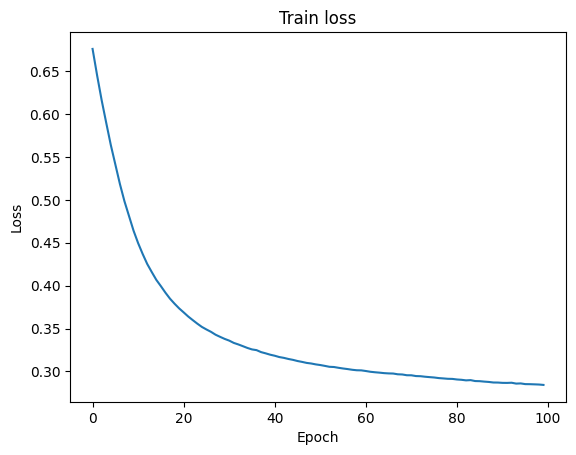

In [45]:
# YOUR CODE HERE
plot_history(history)

❓ What do you observe ❓

> YOUR ANSWER HERE

❗️ <u>Evaluation on unseen data</u> ❗️

🧑🏻‍🏫 A Deep Learning Model is like any other Machine Learning model. Once you've trained it on the training set and are satisfied with how the Neural Network was able to learn, you need to ask: can it be generalized to unseen data such as the test set? 



## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [47]:
# YOUR CODE HERE
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

💡 In other words, you are asked to evaluate your Deep Learning model!

In [51]:
# YOUR CODE HERE
evaluate = model.evaluate(X_test, y_test)
loss = evaluate[0]
accuracy = evaluate[1]

print("Binary_Cross_Entropy: ", loss)
print("Accuracy: ", accuracy)

3/3 [==============================] - 0s 4ms/step - loss: 0.2894 - accuracy: 0.8400
Binary_Cross_Entropy:  0.28938204050064087
Accuracy:  0.8399999737739563


**🧪 Test your code**

In [50]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/eren/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/eren/code/erenkiliclar/data-your-first-neural-network/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_first_model.py::TestFirstModel::test_accuracy PASSED                [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master



❓ Check the accuracy of your predictions visually by using our `plot_decision_regions` available in `utils/plots.py` ❓

2289/2289 [==============================] - 4s 2ms/step


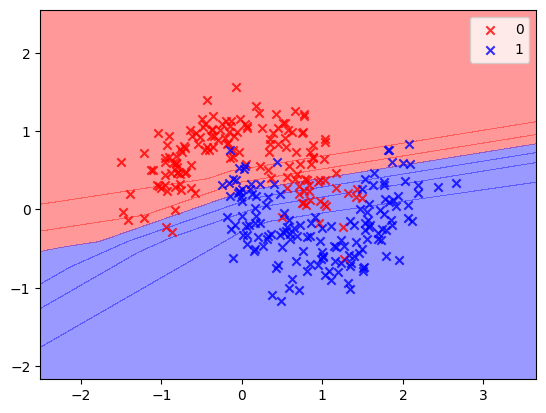

In [52]:
# YOUR CODE HERE
from utils.plots import plot_decision_regions

plot_decision_regions(X, y, model)

😥 It looks like we are **underfitting** a bit, right? 

😁 We can try :
- to train the model a bit longer...
- ...or maybe to create a Deeper Neural network in the next section!

## (5) Training your Neural Network with more epochs

❓ Re-train the model for 500 iterations ❓
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learned on the previous _.fit()_ ...!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [53]:
# YOUR CODE HERE
model = initialize_model()

history = model.fit(X_train, y_train, epochs=500, batch_size=5, verbose=2)

Epoch 1/500
35/35 - 0s - loss: 0.6705 - accuracy: 0.5086 - 425ms/epoch - 12ms/step
Epoch 2/500
35/35 - 0s - loss: 0.6304 - accuracy: 0.6057 - 63ms/epoch - 2ms/step
Epoch 3/500
35/35 - 0s - loss: 0.5974 - accuracy: 0.6800 - 65ms/epoch - 2ms/step
Epoch 4/500
35/35 - 0s - loss: 0.5679 - accuracy: 0.7314 - 59ms/epoch - 2ms/step
Epoch 5/500
35/35 - 0s - loss: 0.5424 - accuracy: 0.7486 - 63ms/epoch - 2ms/step
Epoch 6/500
35/35 - 0s - loss: 0.5189 - accuracy: 0.7829 - 62ms/epoch - 2ms/step
Epoch 7/500
35/35 - 0s - loss: 0.4968 - accuracy: 0.7943 - 62ms/epoch - 2ms/step
Epoch 8/500
35/35 - 0s - loss: 0.4753 - accuracy: 0.8229 - 64ms/epoch - 2ms/step
Epoch 9/500
35/35 - 0s - loss: 0.4562 - accuracy: 0.8400 - 65ms/epoch - 2ms/step
Epoch 10/500
35/35 - 0s - loss: 0.4380 - accuracy: 0.8457 - 71ms/epoch - 2ms/step
Epoch 11/500
35/35 - 0s - loss: 0.4221 - accuracy: 0.8571 - 71ms/epoch - 2ms/step
Epoch 12/500
35/35 - 0s - loss: 0.4075 - accuracy: 0.8571 - 80ms/epoch - 2ms/step
Epoch 13/500
35/35 - 0s

Epoch 101/500
35/35 - 0s - loss: 0.2628 - accuracy: 0.8857 - 77ms/epoch - 2ms/step
Epoch 102/500
35/35 - 0s - loss: 0.2619 - accuracy: 0.8857 - 74ms/epoch - 2ms/step
Epoch 103/500
35/35 - 0s - loss: 0.2616 - accuracy: 0.8857 - 75ms/epoch - 2ms/step
Epoch 104/500
35/35 - 0s - loss: 0.2608 - accuracy: 0.8857 - 81ms/epoch - 2ms/step
Epoch 105/500
35/35 - 0s - loss: 0.2602 - accuracy: 0.8914 - 76ms/epoch - 2ms/step
Epoch 106/500
35/35 - 0s - loss: 0.2603 - accuracy: 0.8914 - 78ms/epoch - 2ms/step
Epoch 107/500
35/35 - 0s - loss: 0.2598 - accuracy: 0.8914 - 71ms/epoch - 2ms/step
Epoch 108/500
35/35 - 0s - loss: 0.2586 - accuracy: 0.8914 - 79ms/epoch - 2ms/step
Epoch 109/500
35/35 - 0s - loss: 0.2586 - accuracy: 0.8914 - 77ms/epoch - 2ms/step
Epoch 110/500
35/35 - 0s - loss: 0.2579 - accuracy: 0.8914 - 75ms/epoch - 2ms/step
Epoch 111/500
35/35 - 0s - loss: 0.2573 - accuracy: 0.8914 - 74ms/epoch - 2ms/step
Epoch 112/500
35/35 - 0s - loss: 0.2567 - accuracy: 0.8914 - 90ms/epoch - 3ms/step
Epoc

Epoch 200/500
35/35 - 0s - loss: 0.2342 - accuracy: 0.9143 - 98ms/epoch - 3ms/step
Epoch 201/500
35/35 - 0s - loss: 0.2341 - accuracy: 0.9143 - 94ms/epoch - 3ms/step
Epoch 202/500
35/35 - 0s - loss: 0.2342 - accuracy: 0.9143 - 80ms/epoch - 2ms/step
Epoch 203/500
35/35 - 0s - loss: 0.2338 - accuracy: 0.9143 - 88ms/epoch - 3ms/step
Epoch 204/500
35/35 - 0s - loss: 0.2339 - accuracy: 0.9143 - 128ms/epoch - 4ms/step
Epoch 205/500
35/35 - 0s - loss: 0.2335 - accuracy: 0.9143 - 122ms/epoch - 3ms/step
Epoch 206/500
35/35 - 0s - loss: 0.2340 - accuracy: 0.9143 - 104ms/epoch - 3ms/step
Epoch 207/500
35/35 - 0s - loss: 0.2336 - accuracy: 0.9143 - 101ms/epoch - 3ms/step
Epoch 208/500
35/35 - 0s - loss: 0.2337 - accuracy: 0.9143 - 109ms/epoch - 3ms/step
Epoch 209/500
35/35 - 0s - loss: 0.2333 - accuracy: 0.9143 - 115ms/epoch - 3ms/step
Epoch 210/500
35/35 - 0s - loss: 0.2330 - accuracy: 0.9143 - 83ms/epoch - 2ms/step
Epoch 211/500
35/35 - 0s - loss: 0.2330 - accuracy: 0.9143 - 91ms/epoch - 3ms/ste

Epoch 299/500
35/35 - 0s - loss: 0.2234 - accuracy: 0.9143 - 89ms/epoch - 3ms/step
Epoch 300/500
35/35 - 0s - loss: 0.2231 - accuracy: 0.9143 - 95ms/epoch - 3ms/step
Epoch 301/500
35/35 - 0s - loss: 0.2229 - accuracy: 0.9086 - 99ms/epoch - 3ms/step
Epoch 302/500
35/35 - 0s - loss: 0.2226 - accuracy: 0.9086 - 89ms/epoch - 3ms/step
Epoch 303/500
35/35 - 0s - loss: 0.2230 - accuracy: 0.9143 - 83ms/epoch - 2ms/step
Epoch 304/500
35/35 - 0s - loss: 0.2230 - accuracy: 0.9086 - 86ms/epoch - 2ms/step
Epoch 305/500
35/35 - 0s - loss: 0.2224 - accuracy: 0.9086 - 77ms/epoch - 2ms/step
Epoch 306/500
35/35 - 0s - loss: 0.2226 - accuracy: 0.9143 - 85ms/epoch - 2ms/step
Epoch 307/500
35/35 - 0s - loss: 0.2225 - accuracy: 0.9086 - 85ms/epoch - 2ms/step
Epoch 308/500
35/35 - 0s - loss: 0.2224 - accuracy: 0.9086 - 92ms/epoch - 3ms/step
Epoch 309/500
35/35 - 0s - loss: 0.2223 - accuracy: 0.9086 - 81ms/epoch - 2ms/step
Epoch 310/500
35/35 - 0s - loss: 0.2228 - accuracy: 0.9143 - 76ms/epoch - 2ms/step
Epoc

Epoch 398/500
35/35 - 0s - loss: 0.2173 - accuracy: 0.9143 - 78ms/epoch - 2ms/step
Epoch 399/500
35/35 - 0s - loss: 0.2177 - accuracy: 0.9086 - 80ms/epoch - 2ms/step
Epoch 400/500
35/35 - 0s - loss: 0.2174 - accuracy: 0.9143 - 75ms/epoch - 2ms/step
Epoch 401/500
35/35 - 0s - loss: 0.2177 - accuracy: 0.9143 - 76ms/epoch - 2ms/step
Epoch 402/500
35/35 - 0s - loss: 0.2173 - accuracy: 0.9143 - 76ms/epoch - 2ms/step
Epoch 403/500
35/35 - 0s - loss: 0.2173 - accuracy: 0.9143 - 76ms/epoch - 2ms/step
Epoch 404/500
35/35 - 0s - loss: 0.2175 - accuracy: 0.9200 - 70ms/epoch - 2ms/step
Epoch 405/500
35/35 - 0s - loss: 0.2174 - accuracy: 0.9143 - 75ms/epoch - 2ms/step
Epoch 406/500
35/35 - 0s - loss: 0.2177 - accuracy: 0.9200 - 77ms/epoch - 2ms/step
Epoch 407/500
35/35 - 0s - loss: 0.2169 - accuracy: 0.9143 - 78ms/epoch - 2ms/step
Epoch 408/500
35/35 - 0s - loss: 0.2170 - accuracy: 0.9143 - 82ms/epoch - 2ms/step
Epoch 409/500
35/35 - 0s - loss: 0.2170 - accuracy: 0.9200 - 76ms/epoch - 2ms/step
Epoc

Epoch 497/500
35/35 - 0s - loss: 0.2125 - accuracy: 0.9257 - 75ms/epoch - 2ms/step
Epoch 498/500
35/35 - 0s - loss: 0.2116 - accuracy: 0.9257 - 81ms/epoch - 2ms/step
Epoch 499/500
35/35 - 0s - loss: 0.2120 - accuracy: 0.9257 - 77ms/epoch - 2ms/step
Epoch 500/500
35/35 - 0s - loss: 0.2118 - accuracy: 0.9257 - 75ms/epoch - 2ms/step


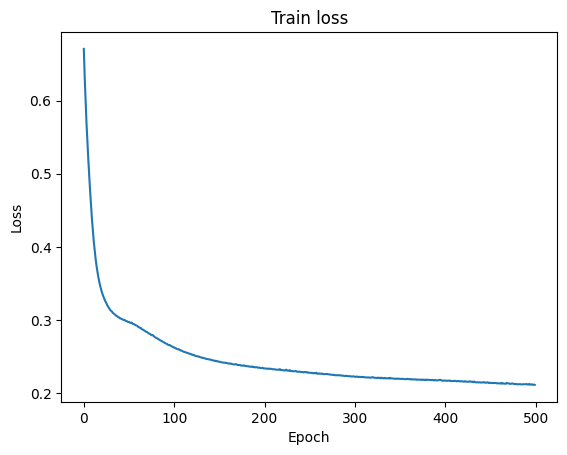

In [54]:
plot_history(history)

❓ Did the test accuracy improve? ❓

In [57]:
# YOUR CODE HERE
y_pred = model.predict(X_test)
evaluate = model.evaluate(X_test, y_test)

loss = evaluate[0]
accuracy = evaluate[1]

print("Binary_Cross_Entropy: ", loss)
print("Accuracy: ", accuracy)

3/3 [==============================] - 0s 3ms/step - loss: 0.2616 - accuracy: 0.8533
Binary_Cross_Entropy:  0.26155975461006165
Accuracy:  0.8533333539962769


<details>
    <summary><i>Not really... explanations here</i></summary>

* The accuracy did not increase by training the model with more epochs...
* So when should have we stopped the training of this Deep Learning Model?
    * Answer in the next chapter <b><i>Deep Learning - Optimizers, Loss and Fitting</i></b>
    
</details>

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suitable for this problem ❓


In [58]:
def initialize_model_2():
    
    model = models.Sequential()
    #############################
    #  1 - Model architecture   #
    #############################  
    model.add(layers.Dense(20, activation="relu", input_dim=2))
    model.add(layers.Dense(10, activation="relu"))
    model.add(layers.Dense(5, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model_2()

❓ What is the number of parameters of your new model ❓

In [59]:
# YOUR CODE HERE
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 20)                60        
                                                                 
 dense_12 (Dense)            (None, 10)                210       
                                                                 
 dense_13 (Dense)            (None, 5)                 55        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


❓ Run your model on the previous dataset for 500 epochs and plot the loss afterwards ❓

In [60]:
# YOUR CODE HERE
history = model.fit(X_train, y_train, epochs=500, batch_size=5, verbose=2)

Epoch 1/500
35/35 - 1s - loss: 0.6971 - accuracy: 0.5314 - 512ms/epoch - 15ms/step
Epoch 2/500
35/35 - 0s - loss: 0.6529 - accuracy: 0.8514 - 70ms/epoch - 2ms/step
Epoch 3/500
35/35 - 0s - loss: 0.6091 - accuracy: 0.8514 - 79ms/epoch - 2ms/step
Epoch 4/500
35/35 - 0s - loss: 0.5670 - accuracy: 0.8571 - 78ms/epoch - 2ms/step
Epoch 5/500
35/35 - 0s - loss: 0.5223 - accuracy: 0.8571 - 92ms/epoch - 3ms/step
Epoch 6/500
35/35 - 0s - loss: 0.4759 - accuracy: 0.8857 - 88ms/epoch - 3ms/step
Epoch 7/500
35/35 - 0s - loss: 0.4214 - accuracy: 0.8743 - 126ms/epoch - 4ms/step
Epoch 8/500
35/35 - 0s - loss: 0.3740 - accuracy: 0.8800 - 106ms/epoch - 3ms/step
Epoch 9/500
35/35 - 0s - loss: 0.3339 - accuracy: 0.8800 - 94ms/epoch - 3ms/step
Epoch 10/500
35/35 - 0s - loss: 0.3114 - accuracy: 0.8629 - 89ms/epoch - 3ms/step
Epoch 11/500
35/35 - 0s - loss: 0.2845 - accuracy: 0.9029 - 100ms/epoch - 3ms/step
Epoch 12/500
35/35 - 0s - loss: 0.2726 - accuracy: 0.8971 - 97ms/epoch - 3ms/step
Epoch 13/500
35/35 -

Epoch 101/500
35/35 - 0s - loss: 0.0567 - accuracy: 0.9714 - 82ms/epoch - 2ms/step
Epoch 102/500
35/35 - 0s - loss: 0.0563 - accuracy: 0.9829 - 86ms/epoch - 2ms/step
Epoch 103/500
35/35 - 0s - loss: 0.0555 - accuracy: 0.9829 - 85ms/epoch - 2ms/step
Epoch 104/500
35/35 - 0s - loss: 0.0543 - accuracy: 0.9886 - 81ms/epoch - 2ms/step
Epoch 105/500
35/35 - 0s - loss: 0.0557 - accuracy: 0.9829 - 88ms/epoch - 3ms/step
Epoch 106/500
35/35 - 0s - loss: 0.0596 - accuracy: 0.9657 - 92ms/epoch - 3ms/step
Epoch 107/500
35/35 - 0s - loss: 0.0579 - accuracy: 0.9771 - 87ms/epoch - 2ms/step
Epoch 108/500
35/35 - 0s - loss: 0.0546 - accuracy: 0.9829 - 81ms/epoch - 2ms/step
Epoch 109/500
35/35 - 0s - loss: 0.0532 - accuracy: 0.9829 - 83ms/epoch - 2ms/step
Epoch 110/500
35/35 - 0s - loss: 0.0543 - accuracy: 0.9829 - 92ms/epoch - 3ms/step
Epoch 111/500
35/35 - 0s - loss: 0.0533 - accuracy: 0.9771 - 83ms/epoch - 2ms/step
Epoch 112/500
35/35 - 0s - loss: 0.0533 - accuracy: 0.9829 - 80ms/epoch - 2ms/step
Epoc

Epoch 200/500
35/35 - 0s - loss: 0.0411 - accuracy: 0.9829 - 98ms/epoch - 3ms/step
Epoch 201/500
35/35 - 0s - loss: 0.0431 - accuracy: 0.9886 - 121ms/epoch - 3ms/step
Epoch 202/500
35/35 - 0s - loss: 0.0428 - accuracy: 0.9886 - 97ms/epoch - 3ms/step
Epoch 203/500
35/35 - 0s - loss: 0.0416 - accuracy: 0.9886 - 81ms/epoch - 2ms/step
Epoch 204/500
35/35 - 0s - loss: 0.0406 - accuracy: 0.9886 - 87ms/epoch - 2ms/step
Epoch 205/500
35/35 - 0s - loss: 0.0421 - accuracy: 0.9886 - 87ms/epoch - 2ms/step
Epoch 206/500
35/35 - 0s - loss: 0.0408 - accuracy: 0.9886 - 92ms/epoch - 3ms/step
Epoch 207/500
35/35 - 0s - loss: 0.0418 - accuracy: 0.9886 - 108ms/epoch - 3ms/step
Epoch 208/500
35/35 - 0s - loss: 0.0397 - accuracy: 0.9886 - 104ms/epoch - 3ms/step
Epoch 209/500
35/35 - 0s - loss: 0.0399 - accuracy: 0.9886 - 94ms/epoch - 3ms/step
Epoch 210/500
35/35 - 0s - loss: 0.0397 - accuracy: 0.9886 - 83ms/epoch - 2ms/step
Epoch 211/500
35/35 - 0s - loss: 0.0381 - accuracy: 0.9886 - 88ms/epoch - 3ms/step
E

Epoch 299/500
35/35 - 0s - loss: 0.0315 - accuracy: 0.9886 - 98ms/epoch - 3ms/step
Epoch 300/500
35/35 - 0s - loss: 0.0353 - accuracy: 0.9886 - 86ms/epoch - 2ms/step
Epoch 301/500
35/35 - 0s - loss: 0.0316 - accuracy: 0.9886 - 93ms/epoch - 3ms/step
Epoch 302/500
35/35 - 0s - loss: 0.0342 - accuracy: 0.9886 - 87ms/epoch - 2ms/step
Epoch 303/500
35/35 - 0s - loss: 0.0308 - accuracy: 0.9886 - 92ms/epoch - 3ms/step
Epoch 304/500
35/35 - 0s - loss: 0.0386 - accuracy: 0.9886 - 88ms/epoch - 3ms/step
Epoch 305/500
35/35 - 0s - loss: 0.0383 - accuracy: 0.9886 - 81ms/epoch - 2ms/step
Epoch 306/500
35/35 - 0s - loss: 0.0341 - accuracy: 0.9886 - 88ms/epoch - 3ms/step
Epoch 307/500
35/35 - 0s - loss: 0.0371 - accuracy: 0.9886 - 81ms/epoch - 2ms/step
Epoch 308/500
35/35 - 0s - loss: 0.0315 - accuracy: 0.9943 - 82ms/epoch - 2ms/step
Epoch 309/500
35/35 - 0s - loss: 0.0327 - accuracy: 0.9829 - 84ms/epoch - 2ms/step
Epoch 310/500
35/35 - 0s - loss: 0.0334 - accuracy: 0.9829 - 91ms/epoch - 3ms/step
Epoc

Epoch 398/500
35/35 - 0s - loss: 0.0258 - accuracy: 0.9943 - 110ms/epoch - 3ms/step
Epoch 399/500
35/35 - 0s - loss: 0.0250 - accuracy: 0.9886 - 117ms/epoch - 3ms/step
Epoch 400/500
35/35 - 0s - loss: 0.0267 - accuracy: 0.9886 - 118ms/epoch - 3ms/step
Epoch 401/500
35/35 - 0s - loss: 0.0223 - accuracy: 0.9886 - 105ms/epoch - 3ms/step
Epoch 402/500
35/35 - 0s - loss: 0.0240 - accuracy: 0.9829 - 96ms/epoch - 3ms/step
Epoch 403/500
35/35 - 0s - loss: 0.0220 - accuracy: 0.9943 - 93ms/epoch - 3ms/step
Epoch 404/500
35/35 - 0s - loss: 0.0235 - accuracy: 0.9886 - 89ms/epoch - 3ms/step
Epoch 405/500
35/35 - 0s - loss: 0.0222 - accuracy: 0.9943 - 83ms/epoch - 2ms/step
Epoch 406/500
35/35 - 0s - loss: 0.0228 - accuracy: 0.9886 - 80ms/epoch - 2ms/step
Epoch 407/500
35/35 - 0s - loss: 0.0263 - accuracy: 0.9886 - 84ms/epoch - 2ms/step
Epoch 408/500
35/35 - 0s - loss: 0.0318 - accuracy: 0.9886 - 76ms/epoch - 2ms/step
Epoch 409/500
35/35 - 0s - loss: 0.0197 - accuracy: 0.9943 - 86ms/epoch - 2ms/step


Epoch 497/500
35/35 - 0s - loss: 0.0165 - accuracy: 0.9943 - 82ms/epoch - 2ms/step
Epoch 498/500
35/35 - 0s - loss: 0.0148 - accuracy: 1.0000 - 82ms/epoch - 2ms/step
Epoch 499/500
35/35 - 0s - loss: 0.0163 - accuracy: 1.0000 - 81ms/epoch - 2ms/step
Epoch 500/500
35/35 - 0s - loss: 0.0208 - accuracy: 0.9886 - 81ms/epoch - 2ms/step


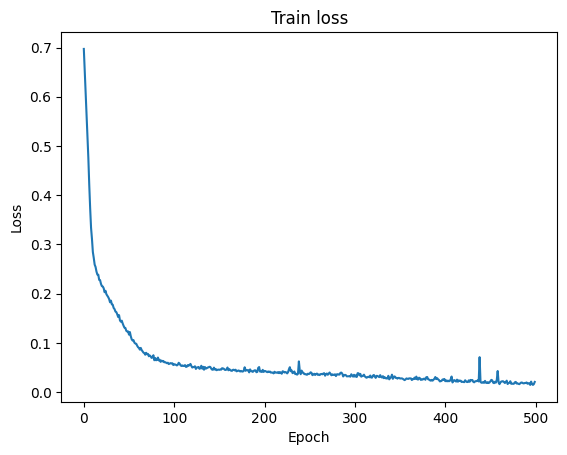

In [61]:
plot_history(history)

❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

In [65]:
# YOUR CODE HERE
y_pred = model.predict(X_test)
evaluate = model.evaluate(X_test, y_test)

loss = evaluate[0]
accuracy_deep = evaluate[1]

print("Cross_entropy: ", loss)
print("Accuracy_deep: ", accuracy_deep)

3/3 [==============================] - 0s 3ms/step - loss: 0.4067 - accuracy: 0.9200
Cross_entropy:  0.4067487418651581
Accuracy_deep:  0.9200000166893005


🧪 **Test your code**

In [66]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/eren/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/eren/code/erenkiliclar/data-your-first-neural-network/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_deeper_model.py::TestDeeperModel::test_accuracy PASSED              [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master



❓ Do you think we are overfitting on the noise ❓ Once again, use the `plot_decision_regions` function to help your intuition.

2289/2289 [==============================] - 4s 2ms/step


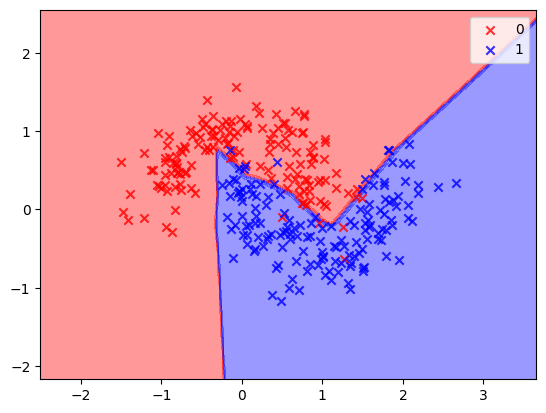

In [67]:
# YOUR CODE HERE
plot_decision_regions(X, y, model)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!